# Linear Regression from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
def load_data(file_path):
    if os.path.exists(file_path) != True:
        raise FileNotFoundError("Given path does not exist! = {}", format(file_path))
    else:
        df = pd.read_csv(file_path)
    return df

def gradient(func, x):
    h = 0.0001
    return (func(x+h)-func(x))/h


In [8]:
file_name = 'real-estate-data.csv'
file_path = os.path.join('..', 'data', file_name)
df = load_data(file_path)


In [10]:
# EDA
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [117]:
# defining the input and output variables
target = np.array(df['price'])
input = np.array(df['sqft_lot'])

# defining the model
# target_est = m*input + b
class my_LinearRegression():
    # initialising with random values
    def __init__(self, m_init=0, b_init=0):
        self.m, self.b = m_init, b_init

    def fit(self, x_train, y_train, epochs = 1000, lr = 0.01):
        # normalising data
        mu_x, sigma_x = np.mean(x_train), np.std(x_train)
        mu_y, sigma_y = np.mean(y_train), np.std(y_train)
        x_train = (x_train-mu_x)/sigma_x
        y_train = (y_train-mu_y)/sigma_y
        # computing the mean squared error
        m, b = self.m, self.b
        # initialising gradient descent
        for i in range(epochs):
            error = (m*x_train + b - y_train)
            n = len(y_train)
            dMSE_dm = (2/n)*np.sum(error*x_train) # * is dot product for np arrays
            dMSE_db = (2/n)*np.sum(error)
            # need to update m and b values
            m -= lr*dMSE_dm
            b -= lr*dMSE_db
        # obtaining parameters for the unnormalized data
        self.m= (sigma_y/sigma_x)*m
        self.b = (b*sigma_y + mu_y - (sigma_y/sigma_x)*m*mu_x)

    def score(self, x_test, y_test):
        m, b = self.m, self.b
        error = m*x_test + b - y_test
        MSE = np.mean(error*error)
        RMSE = np.sqrt(MSE)
        print("RMSE = {:.3f}".format(RMSE), " and MSE = {:.3f}".format(MSE))
    
    def predict(self, x):
        return (self.m)*x + self.b


In [118]:
# test-train split
def test_train_split(X, Y, test_size=0.3):
    n = len(X)
    index = int(n*test_size)
    print(index)
    x_test, x_train = X[:index], X[index:]
    y_test, y_train = Y[:index], Y[index:]
    return x_train, y_train, x_test, y_test

# splitting data
X, Y = np.array(df["sqft_lot"]), np.array(df["price"])
# X_unnorm, Y_unnorm = X, Y
# # normalising overall data
# X = (X-np.mean(X))/np.std(X)
# Y = (Y-np.mean(Y))/np.std(Y)
x_train, y_train, x_test, y_test = test_train_split(X, Y)



6483


In [119]:
model = my_LinearRegression()

model.fit(x_train, y_train)
m = model.m
b = model.b
model.score(x_test, y_test)


RMSE = 372838.802  and MSE = 139008772539.676


In [120]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
x_train_reshaped = x_train.reshape(-1,1)

sk_model.fit(x_train_reshaped, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
print(sk_model.coef_, m)
print(sk_model.intercept_, b)


[0.85794987] 0.8579498672077882
528809.5358366047 528809.5358579874


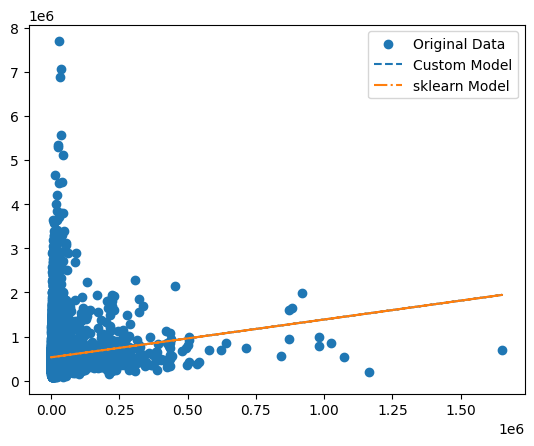

In [122]:
y_pred_custom = model.predict(X)
y_pred_sklearn = sk_model.predict(X.reshape(-1,1))
plt.scatter(X, Y, label='Original Data')
plt.plot(X, y_pred_custom, label='Custom Model', linestyle='--')
plt.plot(X, y_pred_sklearn, label='sklearn Model', linestyle='-.')
plt.legend()



# Outcomes
The model perfectly coincides with the sklearn model, implying good implementation.

The data cannot be fit using a single variable, we need to extend to multi-variable linear regression.

We normalised data to ensure `np.sum()` doesnt overflow, this normalisation causes incorrect parameter values, hence normalization should be done internally and before storing the parameters they should be denormalised.